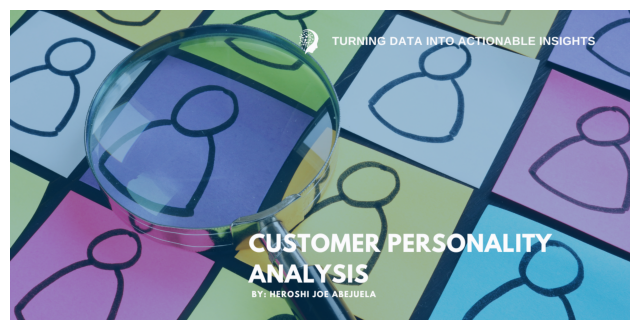

In [44]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = '/content/CUSTOMER PERSONALITY ANALYSIS.png'
image = Image.open(image_path)


plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

### **CUSTOMER PERSONALITY ANALYSIS**
The goal of this analysis is to understand customer purchasing behavior and segment them based on spending patterns across various product categories. By leveraging customer data, we aim to develop actionable insights that help in targeting marketing strategies and improving product offerings.

### **Business Problem:**
The company is facing challenges in effectively targeting its diverse customer base. With multiple product lines (wines, fruits, meat, fish, sweets, and gold products), it is crucial to identify distinct customer segments based on purchasing behavior to optimize marketing efforts, increase customer satisfaction, and boost overall revenue.

### **Solution:**
We applied clustering techniques to the customer dataset, using spending across different product categories as key features. By grouping customers with similar purchasing behaviors, we created distinct customer segments. This approach helps the business tailor its marketing campaigns and product recommendations to specific groups, thereby enhancing customer engagement and driving sales.

### **Business Insights:**
1. **High-Value Customers (Cluster 0):** These customers have higher median incomes and spend more across all product categories, particularly on wines and meat products. Targeting this group with premium offerings and personalized services can enhance customer loyalty and maximize revenue.
   
2. **Moderate Spenders (Clusters 1, 2, 3, 4):** These groups exhibit similar spending behavior, with moderate purchases in multiple categories. They are price-sensitive and might respond well to promotions or bundled product offerings.

3. **Product Preferences:** The majority of customers spend the most on wines and meat products, while spending on sweets, fruits, and fish remains relatively low. The business can explore opportunities to cross-sell or promote less popular categories to diversify spending.

4. **Income-Driven Segmentation:** Income plays a key role in customer segmentation. Higher-income customers are likely to spend more on premium products, while lower-income customers might benefit from discount-driven campaigns.

By understanding these segments, the business can develop targeted marketing strategies that resonate with each group, improving customer satisfaction and overall profitability.

In [28]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [1]:
# Download Data Set
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 32.9MB/s]


In [2]:
# Unzip Data Set
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [7]:
# Load Data Set
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Analyze Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset contains **3 different data types**:

1. **int64**: 25 columns
2. **float64**: 1 column
3. **object**: 3 columns

In [9]:
# Descriptive Statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# Print Out Columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [13]:
# Check for Missing Data
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


There are no null or missing values

In [15]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Added the correct format

# Calculate the customer tenure (days since enrollment)
df['Customer_Tenure'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days

In [16]:
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [17]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

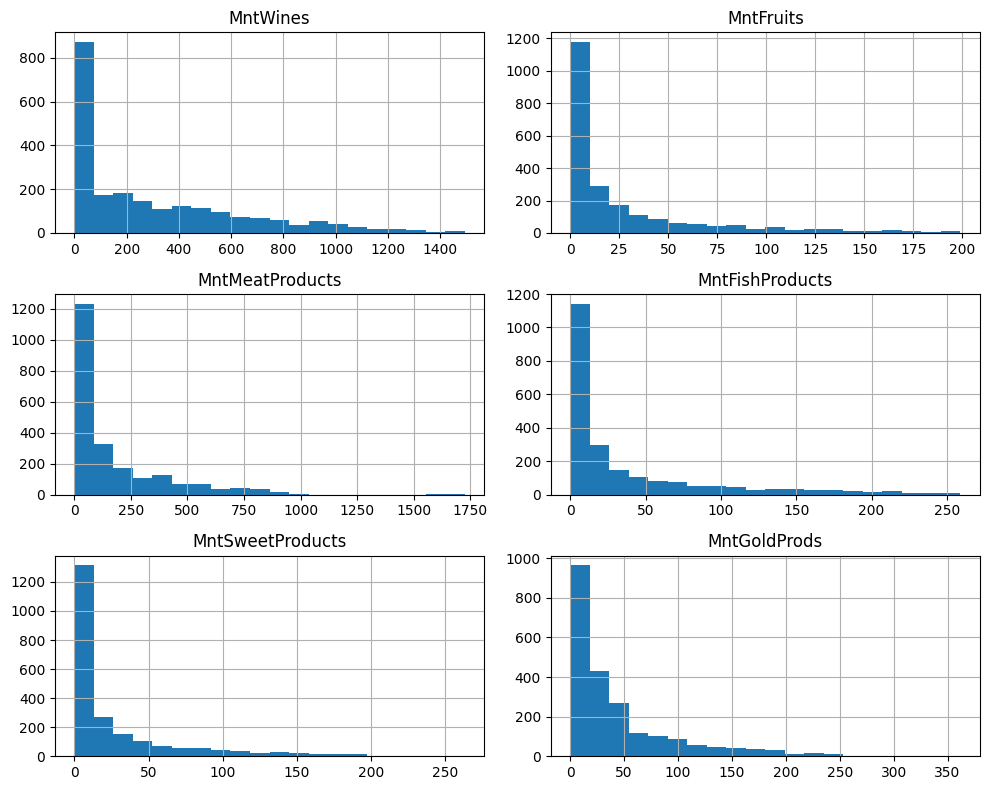

In [18]:
# Plotting histograms of spending columns
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

**Analysis:**
1. **MntWines**: The distribution is heavily skewed to the left, with the majority of customers spending very little on wine (most spend under 200), while a smaller number of customers spend much more (up to 1400).
   
2. **MntFruits**: A similarly skewed distribution shows most customers spend less than 25 on fruits, with very few spending over 100.

3. **MntMeatProducts**: Again, the bulk of customers spend under 200 on meat, with some higher spenders extending the range to around 1700.

4. **MntFishProducts**: Most customers spend under 50 on fish, with very few spending above 100.

5. **MntSweetProducts**: A high concentration of customers spend under 25 on sweets, with some outliers going above 150.

6. **MntGoldProds**: The majority of customers spend under 50 on gold products, with outliers spending up to 350.

**Key Insight**: Across all product categories, the majority of customers exhibit low spending, with a small group of outliers who spend significantly more. This skewed distribution suggests that there are a few high-spenders in the dataset, which is important for understanding and segmenting customers for targeted marketing.

In [20]:
# Select features for clustering
features = df.drop('Response', axis=1)  # We exclude 'Response' since it may be considered a label.

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [23]:
# Select features for clustering
features = df.drop('Response', axis=1)  # We exclude 'Response' since it may be considered a label.

# Impute missing values using the mean
# This replaces NaN with the average value of that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
# Fit KMeans with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Grouping by the clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Alternatively, you can plot the cluster centers
cluster_centers = kmeans.cluster_centers_

# Inverse transform the cluster centers to get them back to the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Get the original feature names from the DataFrame 'df'
# Exclude 'Response' as it was dropped from 'features' used for clustering
feature_names = df.drop(['Response', 'Cluster'], axis=1).columns

# Convert to a DataFrame for better visualization
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=feature_names)
print(cluster_centers_df)

          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1968.133333  71054.833333  0.066667  0.433333  48.666667  898.666667   
1        1967.818182  40666.480899  0.747228  0.600887  46.995565   71.733925   
2        1968.760377  77858.659048  0.043396  0.141509  49.515094  597.224528   
3        1964.241563  59426.754039  0.191829  0.943162  48.454707  495.616341   
4        1973.399399  32739.274659  0.788288  0.366366  50.791291   38.953453   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        22.966667       250.300000        38.733333         30.600000  ...   
1         4.170732        29.764967         5.738359          3.953437  ...   
2        69.883019       473.232075       101.305660         72.303774  ...   
3        26.003552       150.655417  

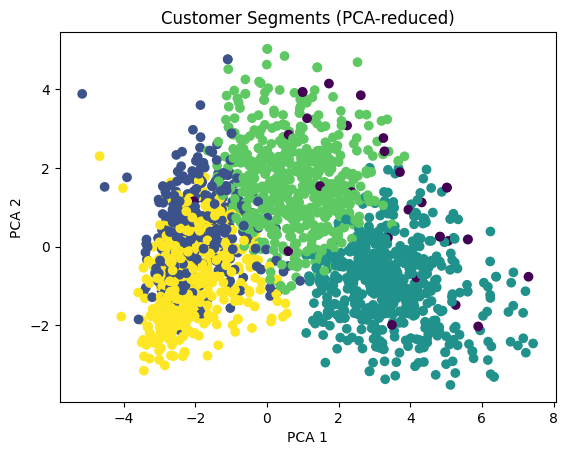

In [29]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**PCA (Principal Component Analysis)** is used to reduce the dimensionality of the dataset to **2 dimensions** for easier visualization of the customer clusters. Here's a breakdown of what PCA is and its role in the code:

### What is PCA?
**PCA** is a technique used to reduce the number of dimensions in a dataset while preserving as much of the original variance as possible. In simpler terms, it transforms the original features into a new set of uncorrelated variables called **principal components**. These components capture the maximum variance from the original data, with the first component explaining the most variance, the second explaining the second most, and so on.

### What PCA Does in This Code:
1. **Dimensionality Reduction**:
   - The original dataset might have many features (dimensions). For visualization purposes, it is difficult to plot or interpret data in high-dimensional space. PCA reduces the dataset to **2 dimensions** by creating two new principal components (`PCA 1` and `PCA 2`) that represent the most important patterns of variability in the data.
   
2. **Transformation of Features**:
   - The `fit_transform(scaled_features)` method applies PCA to the scaled features (the normalized dataset). It learns the principal components and transforms the original data into this new 2D space. The result is stored in `pca_components`, where each data point now has two values corresponding to the two principal components.

3. **Visualization of Clusters**:
   - After the PCA transformation, the clusters (previously computed from a clustering algorithm like KMeans) are plotted in the reduced 2D space using a scatter plot.
   - The **x-axis** represents the first principal component (`PCA 1`), and the **y-axis** represents the second (`PCA 2`).
   - Each point on the plot corresponds to a customer, and the color represents the cluster to which the customer belongs (using the `clusters` variable).

### Why PCA is Important in this Context:
- **Simplified Visualization**: By reducing the data to 2 dimensions, PCA allows you to **visualize** the clusters in a 2D scatter plot, making it easier to interpret the groupings or segments of customers.
- **Variance Preservation**: Although the data is simplified, PCA retains as much of the **original variance** as possible, ensuring that the plot still reflects the most important relationships between the data points.

In short, PCA helps reduce the complexity of the dataset allowing it to visualize the clusters effectively in a 2D space.

**Interpretation:**
- There is not much we can get from this plot but we are sure that we have 4-5 clusters so we will analyze it further

Cluster
4    666
3    563
2    530
1    451
0     30
Name: count, dtype: int64


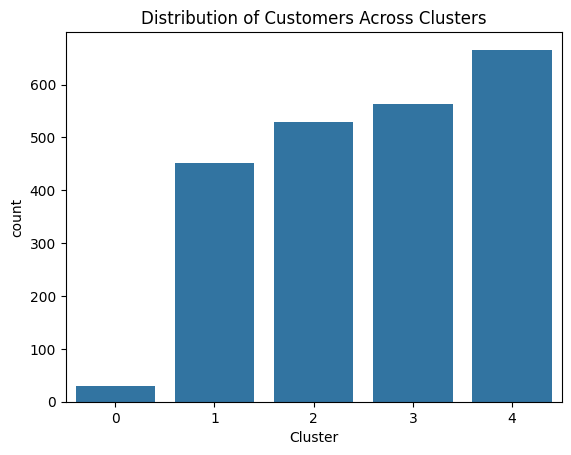

In [30]:
# Count the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Visualize the distribution of clusters
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Customers Across Clusters')
plt.show()

**Key Observations:**

* **Cluster Imbalance:** The data points are not evenly distributed across the clusters.
* **Dominant Clusters:** Clusters 4, 3, and 2 are the largest, containing the majority of the data points.
* **Sparse Cluster:** Cluster 0 is sparsely populated with only 30 data points.

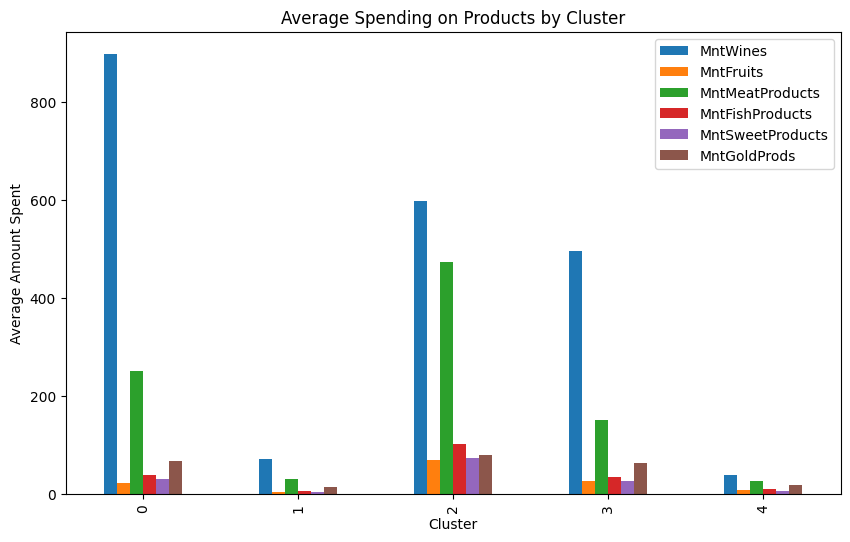

In [40]:
# Compare the mean of different features across clusters
cluster_means = df.groupby('Cluster').mean()

# Visualize cluster means for important features
cluster_means[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending on Products by Cluster')
plt.ylabel('Average Amount Spent')
plt.show()

**Analysis:**

- **Cluster 0 (High-Spenders)**: Older, wealthier customers with minimal kids at home. They spend heavily on wines and other products, engage well with campaigns, and are highly responsive.
- **Cluster 1 (Low Income, Low Engagement)**: Lower-income customers with more kids at home. They have low spending, minimal engagement with campaigns, and a high frequency of web visits.
- **Cluster 2 (Wealthy, Moderate Engagement)**: Wealthier group with minimal kids, spending significantly on wines and other products. Moderate campaign engagement and good purchasing activity.
- **Cluster 3 (Moderate Income, High Activity)**: Middle-aged with moderate income. They spend reasonably across categories and have high store and web purchase activity but lower campaign engagement.
- **Cluster 4 (Low Income, Younger Families)**: Younger, low-income customers with kids at home. They spend the least and have low campaign engagement but visit the web frequently.

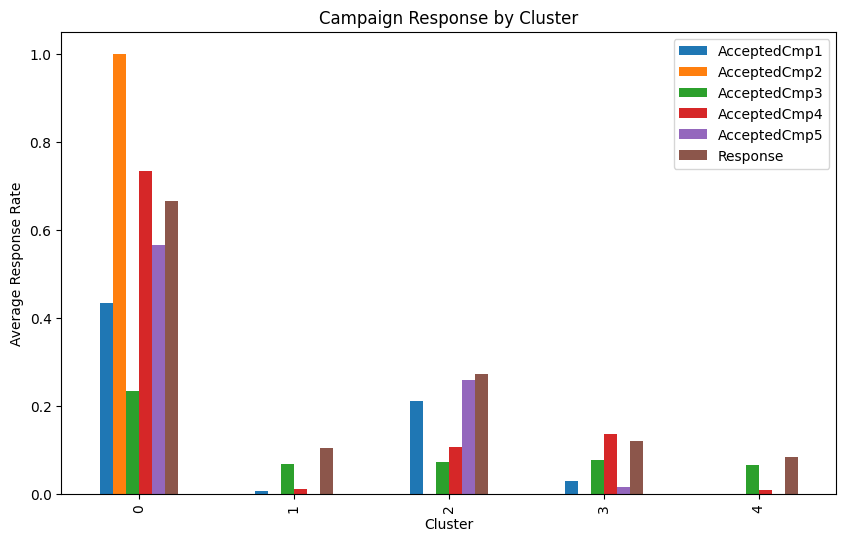

In [33]:
# Campaign response rates by cluster
cluster_response = df.groupby('Cluster').mean()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# Visualize campaign response rates by cluster
cluster_response.plot(kind='bar', figsize=(10, 6))
plt.title('Campaign Response by Cluster')
plt.ylabel('Average Response Rate')
plt.show()

**Analysis**:
- **Cluster 0** has the highest response rate for almost all campaigns, especially **AcceptedCmp2** with a 100% response. This group is clearly very engaged with marketing efforts, making it a prime target for future campaigns.
- **Cluster 2** also shows relatively strong responses, particularly to **AcceptedCmp5** (25.8%) and has an overall response rate of 27.1%, suggesting that they could be moderately influenced by targeted campaigns.
- **Cluster 4** and **Cluster 1** show minimal campaign engagement, with **Cluster 1** having a slightly higher response rate than **Cluster 4**, though both are very low. These groups may require different strategies, such as discounts or product-based promotions, rather than traditional campaigns.

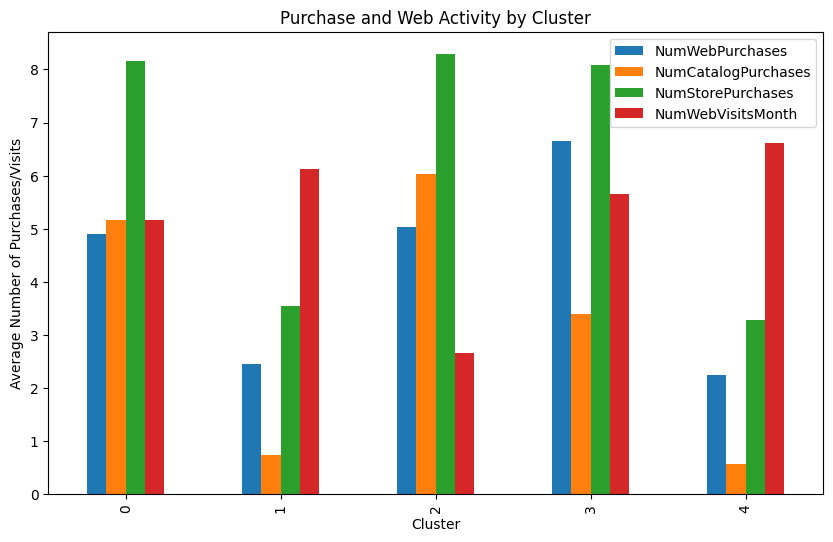

In [34]:
# Compare web activity and purchases across clusters
cluster_activity = df.groupby('Cluster').mean()[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Visualize
cluster_activity.plot(kind='bar', figsize=(10, 6))
plt.title('Purchase and Web Activity by Cluster')
plt.ylabel('Average Number of Purchases/Visits')
plt.show()

**Analysis**:
- **Cluster 0**: High web purchases (4.90), catalog purchases (5.17), and store purchases (8.17), with moderate web visits per month (5.17). This cluster has high activity across all channels, making them multi-channel shoppers. They're clearly a very active segment, making them a priority for omnichannel marketing.
- **Cluster 2**: High across all purchases, with particularly high catalog purchases (6.03) and store purchases (8.29). Web visits are lower (2.65), indicating this group prefers catalogs and physical store visits. Targeting them with catalog-based promotions or in-store deals might be effective.
- **Cluster 3**: Highest web purchases (6.65) and high store purchases (8.09), making this group highly active online and offline. They also have the second-highest web visits per month (5.65), suggesting they are prime candidates for digital marketing campaigns and promotions.
- **Cluster 4 and Cluster 1**: Both these clusters have lower purchases across all channels. They visit websites more frequently but don’t convert as much into purchases, indicating the need for different strategies (e.g., personalized discounts or loyalty programs).

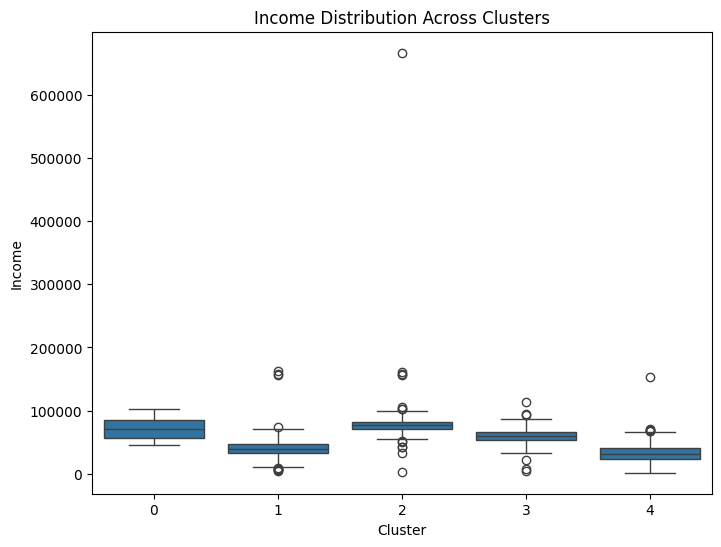

In [35]:
# Boxplot of income by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df)
plt.title('Income Distribution Across Clusters')
plt.show()

**Analysis:**

- **Cluster 0**: This group has a relatively high median income compared to the other clusters, with most incomes concentrated around 100,000. There are few outliers, with some very high incomes beyond 200,000.
- **Cluster 1**: This cluster has a lower median income than Cluster 0, with incomes centered around 50,000. There are a few outliers above the typical range, indicating some higher earners in this group.
- **Cluster 2**: The median income in Cluster 2 is similar to Cluster 1, but with a slightly broader range. Outliers extend to higher income levels, but the majority remain around 50,000 to 60,000.
- **Cluster 3**: This group shows a similar income distribution to Cluster 1 and 2, with a median income around 50,000. There are also outliers, but the overall range is narrower than Cluster 2.
- **Cluster 4**: This cluster exhibits a median income close to Cluster 1 and Cluster 3. There are fewer outliers, and the distribution is relatively tight.

**Key Insight**: Cluster 0 stands out with higher median income and a broader range of values, including high-income outliers. The other clusters exhibit similar median incomes around 50,000 to 60,000, with fewer significant outliers. These differences in income distribution across clusters may suggest varying levels of spending behavior or engagement with products based on income.

In [36]:
for i in range(5):  # 5 Clusters (0, 1, 2, 3, 4)
    print(f'Cluster {i} Summary:')
    print(f'Average Income: {cluster_means["Income"][i]:.2f}')
    print(f'Average Spending on Wines: {cluster_means["MntWines"][i]:.2f}')
    print(f'Campaign Response Rate: {cluster_response["Response"][i]:.2f}')
    print(f'Number of Web Purchases: {cluster_means["NumWebPurchases"][i]:.2f}')
    print('-' * 40)

Cluster 0 Summary:
Average Income: 71054.83
Average Spending on Wines: 898.67
Campaign Response Rate: 0.67
Number of Web Purchases: 4.90
----------------------------------------
Cluster 1 Summary:
Average Income: 40666.48
Average Spending on Wines: 71.73
Campaign Response Rate: 0.10
Number of Web Purchases: 2.44
----------------------------------------
Cluster 2 Summary:
Average Income: 77858.66
Average Spending on Wines: 597.22
Campaign Response Rate: 0.27
Number of Web Purchases: 5.04
----------------------------------------
Cluster 3 Summary:
Average Income: 59426.75
Average Spending on Wines: 495.62
Campaign Response Rate: 0.12
Number of Web Purchases: 6.65
----------------------------------------
Cluster 4 Summary:
Average Income: 32739.27
Average Spending on Wines: 38.95
Campaign Response Rate: 0.08
Number of Web Purchases: 2.24
----------------------------------------


### Interpretations of Cluster Groups

### **Cluster 0: High-Income, High Engagement**
- **Average Income**: 71,054.83
- **Spending on Wines**: 898.67 (Highest among clusters)
- **Campaign Response Rate**: 0.67 (Very high)
- **Web Purchases**: 4.90

**Insights**:  
Customers in Cluster 0 are high-income individuals who tend to spend significantly on wines and respond well to marketing campaigns. This group could be your premium customer segment, and personalized promotions for luxury products might yield high engagement.

**Recommendations**:
- Target high-end products, especially wines and other premium goods.
- Prioritize this segment in future marketing campaigns as they have a strong response rate.
  
---

### **Cluster 1: Low-Income, Low Engagement**
- **Average Income**: 40,666.48
- **Spending on Wines**: 71.73 (Lowest among clusters)
- **Campaign Response Rate**: 0.10
- **Web Purchases**: 2.44

**Insights**:  
Cluster 1 has lower income and is less likely to spend on wines or respond to campaigns. They make fewer web purchases compared to other clusters.

**Recommendations**:
- Focus on offering more affordable products or discounts.
- Test different marketing strategies, such as highlighting budget-friendly options or offering better deals to incentivize purchases.
  
---

### **Cluster 2: High-Income, Medium Engagement**
- **Average Income**: 77,858.66 (Highest)
- **Spending on Wines**: 597.22
- **Campaign Response Rate**: 0.27
- **Web Purchases**: 5.04

**Insights**:  
Customers in Cluster 2 have the highest income and spend moderately on wines. Their campaign response rate is decent, but there’s potential for improvement.

**Recommendations**:
- This cluster represents affluent customers who could be encouraged to increase their spending with more personalized offers or loyalty programs.
- Consider cross-selling luxury products to this group, leveraging their higher disposable income.

---

### **Cluster 3: Mid-Income, High Web Purchases**
- **Average Income**: 59,426.75
- **Spending on Wines**: 495.62
- **Campaign Response Rate**: 0.12
- **Web Purchases**: 6.65 (Highest among clusters)

**Insights**:  
This cluster has a mid-range income and makes the highest number of web purchases. However, they don't respond to campaigns well.

**Recommendations**:
- Since this segment is highly active online, consider targeted online promotions or discounts specifically through digital channels.
- Test different campaign types (e.g., email marketing, flash sales) to improve response rates, as traditional campaigns may not be resonating with this group.

---

### **Cluster 4: Low-Income, Low Spend**
- **Average Income**: 32,739.27 (Lowest)
- **Spending on Wines**: 38.95
- **Campaign Response Rate**: 0.08 (Lowest)
- **Web Purchases**: 2.24

**Insights**:  
Cluster 4 represents the lowest-income customers with minimal spending on wines and the lowest response to campaigns. They also have low web purchase activity.

**Recommendations**:
- Focus on value-driven products or discount offerings for this group.
- Marketing campaigns might need to focus on affordability and highlight cost-saving options, as traditional product campaigns have low effectiveness here.

---

### **Overall Strategic Insights**:
- **Premium Segments (Cluster 0 and 2)**: Focus on high-end products and personalized marketing to cater to their higher disposable income and spending behavior.
- **Budget Segments (Cluster 1 and 4)**: Consider strategies aimed at affordability, such as discounts and bundles, to encourage spending.
- **Online Shoppers (Cluster 3)**: Invest in digital marketing, loyalty programs, and exclusive online deals to capitalize on their online activity.

By tailoring strategies to the unique behaviors and demographics of each segment, the business can enhance marketing effectiveness and optimize product offerings for each customer group.

### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!